# Newton's Method

In this lab we will implement a Newton's method. We will discuss it in more details in class hence I will guide you.

The problem we will aim to solve is a **Logistic regression**
$$f(x) = \frac1n \sum_{i=1}^n \log(1+\exp(-y_ia_i^Tx))+\frac1{2n} \|x\|^2$$


*   Is this problem convex?
*   Is this problem strongly convex?
*   What is gradient?
*   What is Hessian?


**Gradient**: 
$$
\frac{\partial f(x)}{\partial x} = \frac{1}{n} \sum_{i=1}^n \frac{-y_i  a_i  \exp(-y_i a_i^T x)}{1 + \exp(-y_i  a_i^T  x)} + \frac{1}{n} x
$$



**Hassian**:
$$
\frac{\partial^2 f(x)}{\partial x^2} = \frac{1}{n} \sum_{i=1}^n \underbrace{\frac{y_i^2 a_i^2 \exp(-y_i a_i^T x)}{[1 + \exp(-y_i a_i^T x)]^2}}_{s_i} + \frac{1}{n} \\

s_i \leq \frac{1}{4} \Leftrightarrow \frac{a}{(1 + a)^2} \leq 0.25, \forall a \geq 0
$$

**Convexty**: For convexity the $\Delta^2 f(x)$ must be should be non-negative, which is the case for us.  Also the sum of all convex functions is convex


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for the logistic regression
np.random.seed(0)
n = 10000
d = 200
A = np.random.randn(n,d)
xo = np.random.randn(d)
y = np.ones(n)
y[np.dot(A,xo)<0]=-1
A.shape , y.shape, xo.shape


((10000, 200), (10000,), (200,))

## Task #0
For the dataset above, what is the $f(w^*)$?


$f(w^*)  = 0 $ 

TODO

In [2]:
def logistic_loss_and_gradient(w):
    z = np.dot(A, w)
    logistic_loss = np.mean(np.log(1 + np.exp(-y * z))) + (1/(2*n)) * np.linalg.norm(w)**2
    # gradient = (-1/n) * np.dot(A.T, (y / (1 + np.exp(y * z)))) + (1/n) * w
    gradient = (-1/n) * np.dot(A.T, (y * np.exp(-y * z) / (1 + np.exp(-y * z)))) + (1/n) * w
    return logistic_loss, gradient

# Function to calculate accuracy
def calculate_accuracy(w):
    preds = np.dot(A, w)
    preds_binary = np.where(preds >= 0, 1, -1)
    return np.mean(preds_binary == y)

# Gradient Descent parameters
alpha = 1  # Learning rate
gamma =1e-4
iterations = 3000 # Number of iterations
w = np.zeros(d)  # Starting point
epoch_count = 0
# Gradient Descent algorithm
loss_history = []
norm_history = []
accuracy_history = []
## implement line search for step size
loss, gradient = logistic_loss_and_gradient(w)
i = 0
while i < iterations and np.linalg.norm(gradient) > 1e-6:
    i += 1
    alpha = 1
    w_new = w - alpha * gradient
    loss_new, new_grad  = logistic_loss_and_gradient(w_new)
    epoch_count += 1
    while loss_new > loss -gamma * alpha * new_grad.dot(gradient):
        alpha = alpha  / 2
        w_new = w - alpha * gradient
        loss_new, new_grad = logistic_loss_and_gradient(w_new)
        epoch_count += 1

    w = w_new
    loss = loss_new
    gradient = new_grad
    loss_history.append(loss)
    norm_history.append(np.linalg.norm(gradient)**2)
    accuracy_history.append(calculate_accuracy(w))


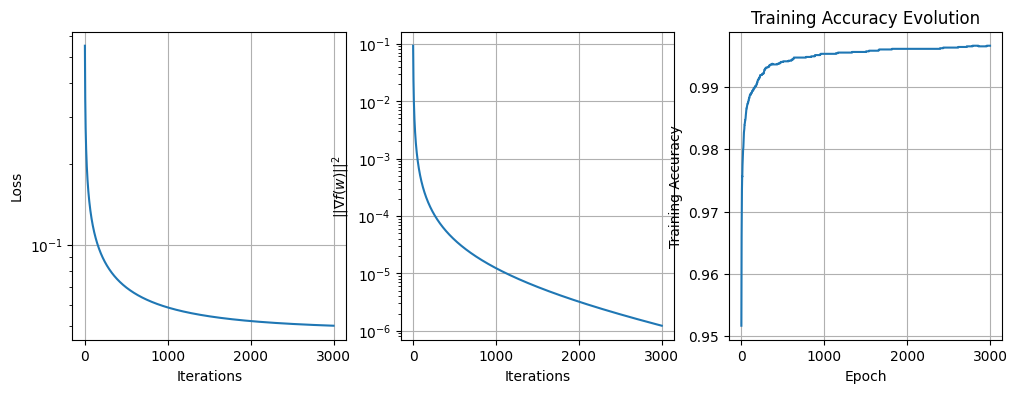

(0.05002784027408576, 0.0011086551142338863, 0.9966, 3000)

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.semilogy(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
# plt.show()

plt.subplot(1, 3, 2)
plt.semilogy(norm_history)
plt.xlabel('Iterations')
plt.ylabel('$||\\nabla f(w)||^2$')
plt.grid()
# plt.show()

# Evolution of Training Accuracy
plt.subplot(1, 3, 3)
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Evolution')
plt.grid()

# plt.tight_layout()
plt.show()

(loss, np.linalg.norm(gradient), accuracy_history[-1], epoch_count)

## Task #1
Run GD to optimize the logistic regression problem. Choose starting point $x_0 = 0$. Show the evolution of
*  $\{f(x_t)-f^*\}$
*  $\{\| \nabla f(x_t) \|^2 \}$
*  training accuracy
as a function of epochs.

Note: implement a line-search procedure and do not forget to count the computational of function values and gradients, each as one epoch


## Task #2

Let's implement a Newton's Method. The update rule is given by
$$
x_{t+1} = x_t - \gamma_t [ \nabla^2 f(x_t) ]^{-1} \nabla f(x_t).
$$

Note:
*  the Hessian has a small dimension, so we should be able to just compute the inverse or use some solver.
*  one should use a line-search, but let's just choose $\gamma_t = 1$ and if that works, do not bother



**Hassian**:
$$
\frac{\partial^2 f(x)}{\partial x^2} = \frac{1}{n} \sum_{i=1}^n \underbrace{\frac{y_i^2 a_i^2 \exp(-y_i a_i^T x)}{[1 + \exp(-y_i a_i^T x)]^2}}_{s_i} + \frac{1}{n} \\

In [4]:
np.random.seed(0)
n = 10000
d = 200
A = np.random.randn(n,d)
xo = np.random.randn(d)
y = np.ones(n)
y[np.dot(A,xo)<0]=-1
A.shape , y.shape, xo.shape

((10000, 200), (10000,), (200,))

In [5]:
# def logistic_loss_and_gradient_hessian(w):
#     z = np.dot(A, w)
#     logistic_loss = np.mean(np.log(1 + np.exp(-y * z))) + (1/(2*n)) * np.linalg.norm(w)**2
#     gradient = (-1/n) * np.dot(A.T, (y * np.exp(-y * z) / (1 + np.exp(-y * z)))) + (1/n) * w
#     print(gradient.shape)
#     print(np.dot(A.T, A).shape)
#     print(np.exp(-y * z).shape)
#     print(A.shape)
#     print(np.dot(y, y.T))
#     print(((np.exp(-y * z) / (1 + np.exp(-y * z))**2)* A).shape)
#     hessian = (1/n) * np.dot(y, y.T) * np.dot(A.T, np.exp(-y * z) / (1 + np.exp(-y * z))**2 @ A) + (1/n)
#     print(hessian.shape)
#     return logistic_loss, gradient, hessian



def logistic_loss_and_gradient_hessian(w):
    z = np.dot(A, w)
    # Compute the logistic loss
    logistic_loss = np.mean(np.log(1 + np.exp(-y * z))) + (1/(2*n)) * np.linalg.norm(w)**2

    # Compute the gradient
    sigmoid = 1 / (1 + np.exp(-y * z))
    gradient = (-1/n) * np.dot(A.T, y * (1 - sigmoid)) + (1/n) * w

    # Compute the Hessian
    diag_sigmoid = sigmoid * (1 - sigmoid)
    D = np.diag(diag_sigmoid)
    Hessian = (1/n) * A.T @ D @ A + (1/n) * np.eye(d)

    return logistic_loss, gradient, Hessian



In [6]:
loss_history_newton, norm_history_newton, accuracy_history_newton = [], [], []
for i in range(10):
    loss, gradient, hessian = logistic_loss_and_gradient_hessian(w)
    w = w - np.linalg.inv(hessian).dot(gradient)
    loss_history_newton.append(loss)
    norm_history_newton.append(np.linalg.norm(gradient)**2)
    accuracy_history_newton.append(calculate_accuracy(w))

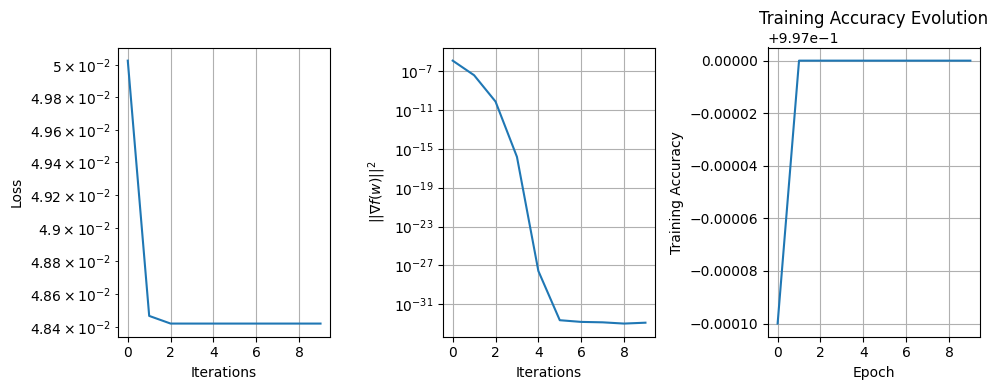

(0.048422712141865595, 3.524915551742083e-17, 0.9966, 3000)

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.semilogy(loss_history_newton)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
# plt.show()

plt.subplot(1, 3, 2)
plt.semilogy(norm_history_newton)
plt.xlabel('Iterations')
plt.ylabel('$||\\nabla f(w)||^2$')
plt.grid()
# plt.show()

# Evolution of Training Accuracy
plt.subplot(1, 3, 3)
plt.plot(accuracy_history_newton)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Evolution')
plt.grid()

plt.tight_layout()
plt.show()

(loss, np.linalg.norm(gradient), accuracy_history[-1], epoch_count)

## Task #3

Make a fair comparison between GD and Newton's method

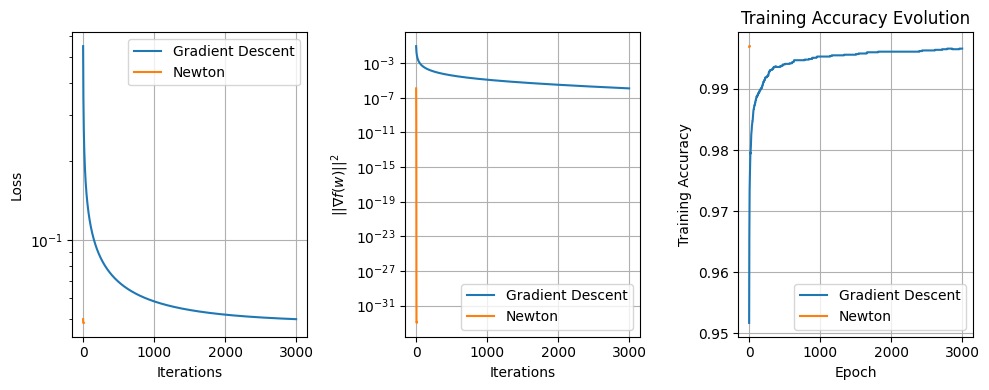

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.semilogy(loss_history, label='Gradient Descent')
plt.semilogy(loss_history_newton, label='Newton')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.semilogy(norm_history, label='Gradient Descent')
plt.semilogy(norm_history_newton, label='Newton')
plt.xlabel('Iterations')
plt.ylabel('$||\\nabla f(w)||^2$')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(accuracy_history, label='Gradient Descent')
plt.plot(accuracy_history_newton, label='Newton')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Evolution')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()